# Burn-in Simulation

**Purpose**: Relax artificially injected particles with Jupiter at a fixed position (no migration).

This notebook uses the shared `simulation` module to avoid code duplication.

## Workflow
1. Configure simulation parameters
2. Run simulation (or load from checkpoint)
3. Analyze and visualize results

## 1. Setup and Imports

In [1]:
# Add simulation module to path
import sys
sys.path.insert(0, '.')

from simulation import (
    SimulationConfig,
    run_simulation,
    load_checkpoint,
    plot_trojan_evolution,
    plot_snapshot,
    create_animation,
    compute_population_summary
)

print('Simulation module loaded successfully!')

/Users/zoutongshen/miniforge3/envs/Amuse-env/lib/python3.12/site-packages/amuse/support/options.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Simulation module loaded successfully!


## 2. Configuration

Adjust these parameters for your burn-in simulation:

In [2]:
# === BURN-IN CONFIGURATION ===

# Duration in thousands of years
DURATION_KYR = 10

# Jupiter's semi-major axis (AU)
JUPITER_A = 5.6

# Number of planetesimals
N_PLANETESIMALS = 1000

# Input file (set to None to start fresh, or path to continue from previous)
INPUT_FILE = None  # e.g., 'jupiter_burnin_5kyr_5.2au.pkl'

# Number of snapshots to save
N_SNAPSHOTS = 200

# Create configuration
config = SimulationConfig.burnin(
    duration_kyr=DURATION_KYR,
    jupiter_a=JUPITER_A,
    input_file=INPUT_FILE,
    n_planetesimals=N_PLANETESIMALS,
    n_snapshots=N_SNAPSHOTS,
    trojan_emphasis=True
)

print(f'Configuration: {config.name}')
print(f'  Duration: {config.end_time:.0f} years')
print(f'  Jupiter at: {config.jupiter_initial_a} AU')
print(f'  Planetesimals: {config.n_planetesimals}')
print(f'  Output: {config.output_file}')

Configuration: jupiter_burnin_10kyr_5.6au
  Duration: 10000 years
  Jupiter at: 5.6 AU
  Planetesimals: 1000
  Output: jupiter_burnin_10kyr_5.6au.pkl


## 3. Run Simulation

This will take some time depending on the duration.

In [3]:
# Run the simulation
results = run_simulation(config, verbose=True)

/Users/zoutongshen/miniforge3/envs/Amuse-env/lib/python3.12/site-packages/amuse/ext/orbital_elements.py:344: UserWarning: new_binary_from_orbital_elements is deprecated, use generate_binaries instead
  warnings.warn(


Created structured disk with 1000 particles:
  Inner (0.7-3 AU): 486 (48.6%)
  Mid (3-10 AU): 297 (29.7%)
  Co-orbital (~5.6 AU): 161 (16.1%)
  Outer (10-30 AU): 56 (5.6%)
Running burnin simulation: jupiter_burnin_10kyr_5.6au
Duration: 10000 years
Snapshots: 200
Massive bodies: 8
Planetesimals: 1000
Snapshot 0/200: t=0.0 yr, Jupiter r=5.652 AU, L4=23, L5=28
Snapshot 1/200: t=50.0 yr, Jupiter r=5.846 AU, L4=22, L5=24
Snapshot 2/200: t=100.1 yr, Jupiter r=5.690 AU, L4=32, L5=30
Snapshot 3/200: t=150.1 yr, Jupiter r=5.367 AU, L4=21, L5=22
Snapshot 4/200: t=200.1 yr, Jupiter r=5.353 AU, L4=19, L5=21
Snapshot 5/200: t=250.1 yr, Jupiter r=5.670 AU, L4=28, L5=26
Snapshot 6/200: t=300.1 yr, Jupiter r=5.850 AU, L4=24, L5=29
Snapshot 7/200: t=350.0 yr, Jupiter r=5.640 AU, L4=27, L5=25
Snapshot 8/200: t=400.0 yr, Jupiter r=5.330 AU, L4=19, L5=22
Snapshot 9/200: t=450.0 yr, Jupiter r=5.393 AU, L4=24, L5=30
Snapshot 10/200: t=500.0 yr, Jupiter r=5.725 AU, L4=19, L5=26
Snapshot 11/200: t=550.0 yr, J

## 4. Analysis and Visualization

In [4]:
# If loading from saved file instead of running:
# results = load_checkpoint(config.output_file)

times = results['times']
l4_counts = results['l4_counts']
l5_counts = results['l5_counts']
snapshots_massive = results['snapshots_massive']
snapshots_planetesimals = results['snapshots_planetesimals']

print(f'Loaded {len(times)} snapshots')
print(f'Time range: {times[0]:.1f} - {times[-1]:.1f} yr')

Loaded 201 snapshots
Time range: 0.0 - 10000.0 yr


Saved: jupiter_burnin_10kyr_5.6au_evolution.png


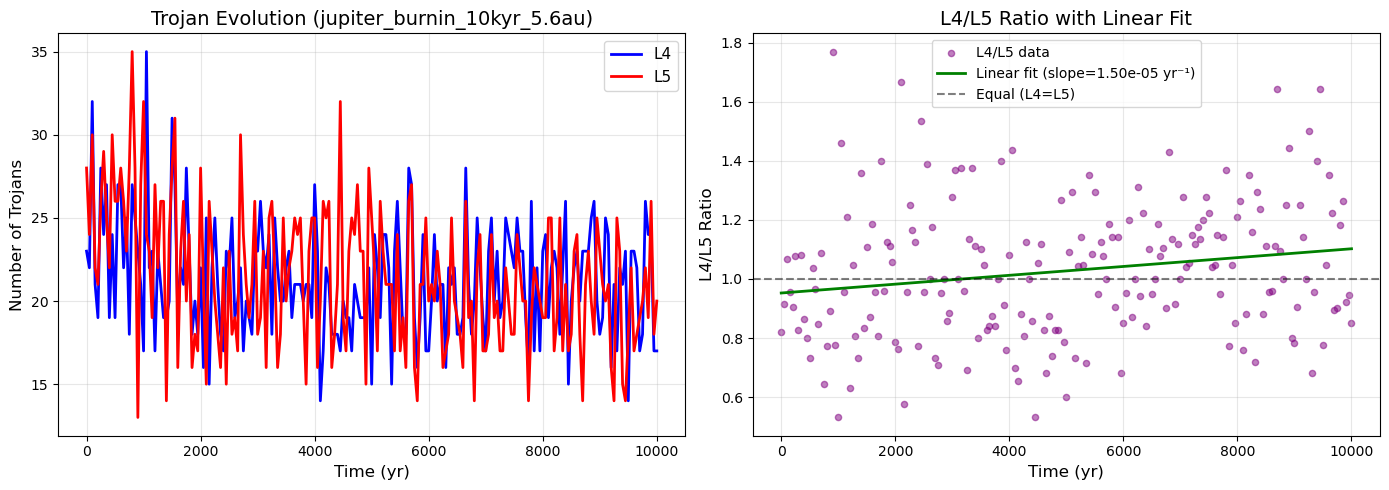

In [ ]:
# Plot Trojan population evolution
import os
os.makedirs('results/png', exist_ok=True)

fig = plot_trojan_evolution(
    times, l4_counts, l5_counts,
    title=f'Trojan Evolution ({config.name})'
)
fig.savefig(f'results/png/{config.name}_evolution.png', dpi=150)
print(f'Saved: results/png/{config.name}_evolution.png')

In [6]:
# Population summary
summary = compute_population_summary(times, l4_counts, l5_counts)

print('=' * 60)
print('POPULATION SUMMARY')
print('=' * 60)
print(f"Initial: L4={summary['initial_l4']}, L5={summary['initial_l5']}, Total={summary['initial_total']}")
print(f"Final:   L4={summary['final_l4']}, L5={summary['final_l5']}, Total={summary['final_total']}")
print(f"Initial L4/L5 ratio: {summary['initial_ratio']:.3f}")
print(f"Final L4/L5 ratio:   {summary['final_ratio']:.3f}")
print(f"L4/L5 ratio slope:   {summary['ratio_slope']:.3e} yr⁻¹")
print(f"Retention: {summary['retention_percent']:.1f}%")
print('=' * 60)

POPULATION SUMMARY
Initial: L4=23, L5=28, Total=51
Final:   L4=17, L5=20, Total=37
Initial L4/L5 ratio: 0.821
Final L4/L5 ratio:   0.850
L4/L5 ratio slope:   1.497e-05 yr⁻¹
Retention: 72.5%


Saved: jupiter_burnin_10kyr_5.6au_final.png


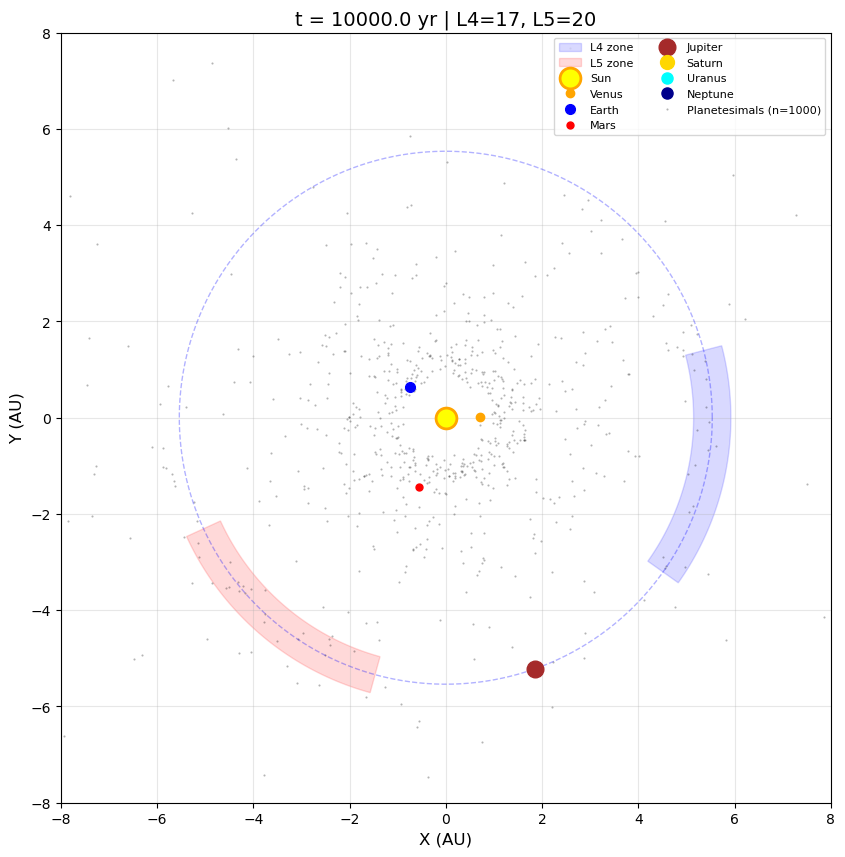

In [ ]:
# Plot final snapshot
fig = plot_snapshot(
    snapshots_massive[-1],
    snapshots_planetesimals[-1],
    times[-1],
    show_trojan_zones=True
)
fig.savefig(f'results/png/{config.name}_final.png', dpi=150)
print(f'Saved: results/png/{config.name}_final.png')

## 5. Create Animation (Optional)

Creating animation with 201 frames...
Saving to jupiter_burnin_10kyr_5.6au.gif...
Animation saved: jupiter_burnin_10kyr_5.6au.gif (201 frames, 13.4s)


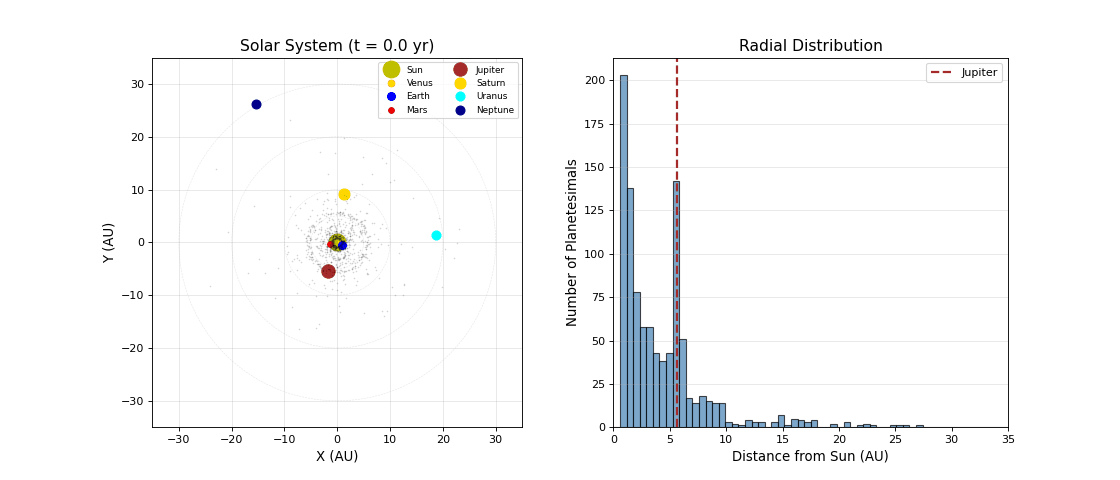

In [ ]:
# Create animated GIF (takes a minute)
import os
os.makedirs('results/gif', exist_ok=True)

gif_file = create_animation(
    times,
    snapshots_massive,
    snapshots_planetesimals,
    output_file=f'results/gif/{config.name}.gif',
    fps=15,
    dpi=80
)

# Display the animation
from IPython.display import Image
Image(filename=gif_file)